In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py 

In [2]:

with h5py.File('results_TDPaperOptimizedScript.hdf5', 'r') as f:
    
    exp_data = f['exp_data'][:]
    gammas_data = f['gammas_data'][:]
    gammas_names = f['gammas_names'][:].astype(str)
    exp_names = f['exp_names'][:].astype(str)
    recProbExp = f['recProbExp'][:]

with h5py.File('results_TDPaperOptimized2.hdf5', 'r') as f:
    
    exp_data_old = f['exp_data'][:]
    gammas_data_old = f['gammas_data'][:]
    gammas_names_old = f['gammas_names'][:].astype(str)
    exp_names = f['exp_names'][:].astype(str)
    recProbExp_old = f['recProbExp'][:]

In [3]:
print(exp_names)

['Tnw' 'Tw' 'O_den' 'pressure' 'current' 'FluxIon' 'EavgMB']


In [4]:
Tnw_vec = exp_data[:, 0]
Tw_vec = exp_data[:, 1]
pressure_vec = exp_data[:, 3]
current_vec = exp_data[:, 4]
gammas_total_vec = np.sum(gammas_data, axis=1)
gammas_exp_vec = recProbExp


gammas_total_old_vec = np.sum(gammas_data_old, axis=1)

pair:  [262.53133733 265.49039366 268.28248792 276.84558189 281.93841258
 290.0677226  269.53534743 273.34686625 276.98517131 280.45629675
 288.44229854 295.51542442 307.3001819  324.063654   340.03504125]
pair:  [286.80208631 289.44956301 291.95269446 294.31804697 299.67173672
 304.30794586 311.838316   322.8036195  293.41748159 296.87130715
 300.20619241 303.42525776 310.98668654 317.89249933 329.93230117
 348.2897795  364.53001706]
pair:  [305.36649745 308.13522322 310.73354675 313.16971083 318.60476684
 323.20663754 330.42599782 340.533418   311.72120783 315.15240639
 318.48539091 321.72192152 329.40281316 336.51937104 349.1694944
 368.907834   385.42111662]
pair:  [327.53090967 330.42088502 333.11440112 335.62137727 341.13780073
 345.70533414 352.61368704 361.8632305  333.624809   337.03343153
 340.36455854 343.61859037 351.41900578 358.74633383 372.00674932
 393.1257681  409.91221146]


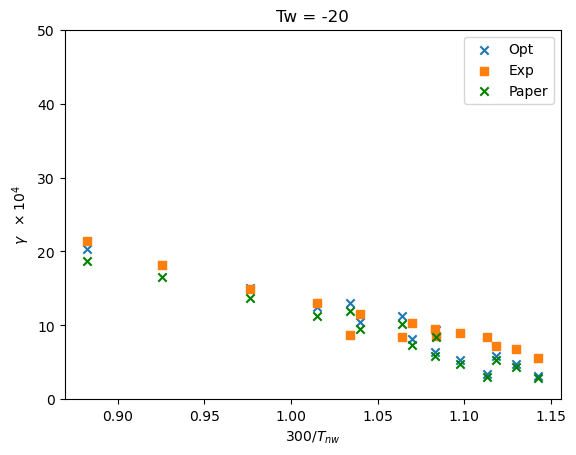

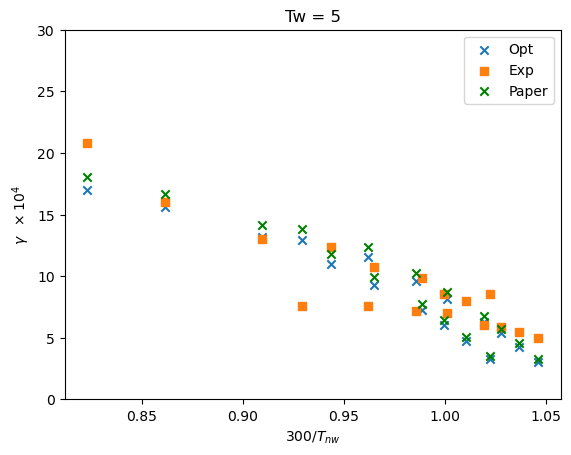

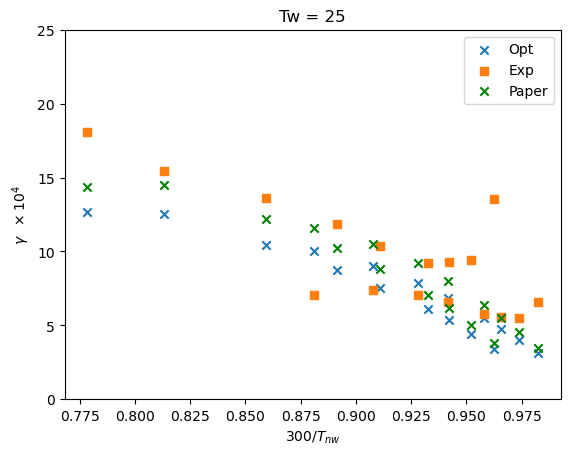

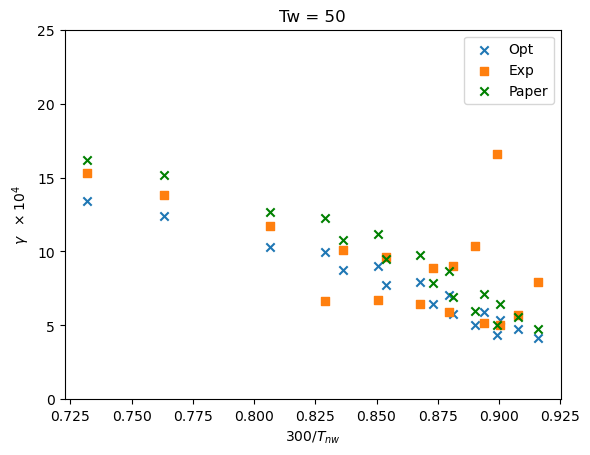

In [5]:
Tw_unique_values = np.unique(Tw_vec)


sum_value = 0

for value in Tw_unique_values:
    Tw = value
    indices = np.where((Tw_vec == Tw))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_total_comp = gammas_data[indices, :]
    
    sum_value += np.sum((gammas_total - gammas_exp_vec[indices])**2)
    
    gammas_exp = gammas_exp_vec[indices]
    Tnw = Tnw_vec[indices]
    print("pair: ", Tnw)
    x_vec = 300*np.reciprocal(Tnw)
    
    pressure = pressure_vec[indices]
    # plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(x_vec, gammas_total*1e4, label='Opt', marker='x')
    ax.scatter(x_vec, gammas_exp*1e4, label='Exp', marker='s')
    ax.scatter(x_vec, gammas_total_old_vec[indices]*1e4, label='Paper', marker='x', color='green')
    
    
    if Tw-273.15 == -20:
        ax.set_yticks(range(0, 51, 10))
        filename = 'Tw-20UpgMod.png'
    if Tw-273.15 == 5:
        ax.set_yticks(range(0, 31, 5))
        filename = 'Tw5UpgMod.png'
    if Tw-273.15 == 25:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw25UpgMod.png'
    if Tw-273.15 == 50:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw50UpgMod.png'
    
    # for i in range(gammas_data.shape[1]):
    #     plt.scatter(x_vec, gammas_total_comp[:, i], label=gammas_names[i], marker='.')
    
    # plt.grid()
    plt.xlabel(r"$300/T_{nw}$")
    plt.ylabel(r"$\gamma ~~ \times 10^4$")
    plt.title('Tw = %d' % (Tw-273.15))
    # plt.yscale('log')
    plt.legend()
    # plt.show()
    # plt.savefig("figures/"+filename)

In [6]:

plot_reactions_vec = ["g_r6", "g_r4", "g_r8", "g_r11", "g_r7"]
# plot_reactions_vec = ["g_r6", "g_r4", "g_r8","g_r7"]
# plot_reactions_vec = ["g_r4"]

colors_labels = ['blue', 'orange', 'green', 'pink', 'red']
translate_labels = {
    "g_r6": "O+Os",
    "g_r4": "O+Of",
    "g_r7": "Of+Os",
    "g_r8": "Of+Of",
    "g_r11": "O2+Of"
}

pair:  [262.53133733 265.49039366 268.28248792 276.84558189 281.93841258
 290.0677226  269.53534743 273.34686625 276.98517131 280.45629675
 288.44229854 295.51542442 307.3001819  324.063654   340.03504125]
pair:  [286.80208631 289.44956301 291.95269446 294.31804697 299.67173672
 304.30794586 311.838316   322.8036195  293.41748159 296.87130715
 300.20619241 303.42525776 310.98668654 317.89249933 329.93230117
 348.2897795  364.53001706]
pair:  [305.36649745 308.13522322 310.73354675 313.16971083 318.60476684
 323.20663754 330.42599782 340.533418   311.72120783 315.15240639
 318.48539091 321.72192152 329.40281316 336.51937104 349.1694944
 368.907834   385.42111662]
pair:  [327.53090967 330.42088502 333.11440112 335.62137727 341.13780073
 345.70533414 352.61368704 361.8632305  333.624809   337.03343153
 340.36455854 343.61859037 351.41900578 358.74633383 372.00674932
 393.1257681  409.91221146]


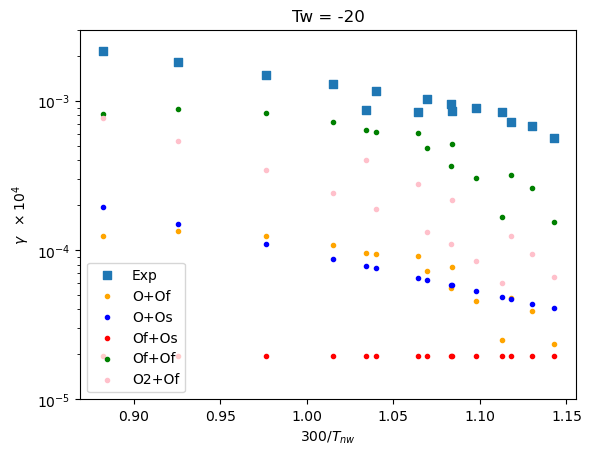

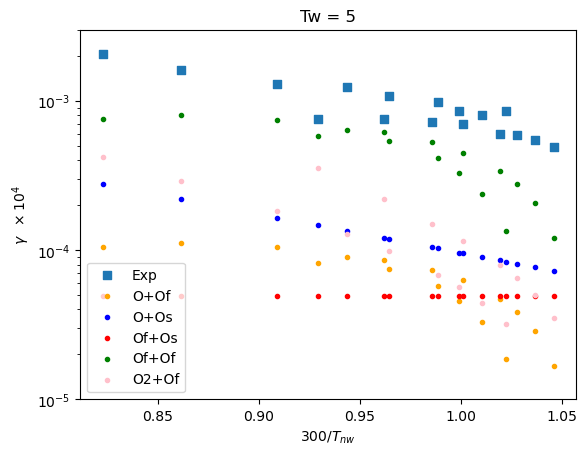

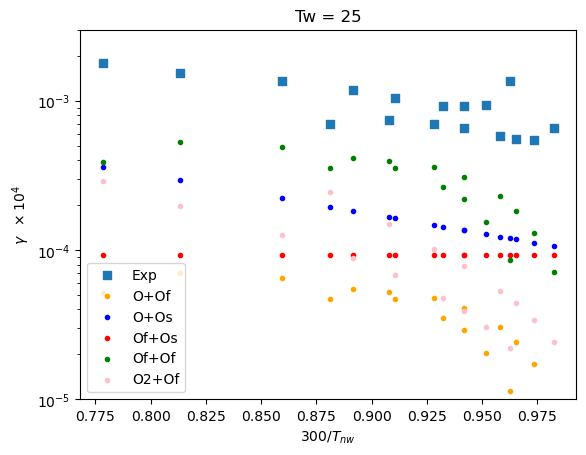

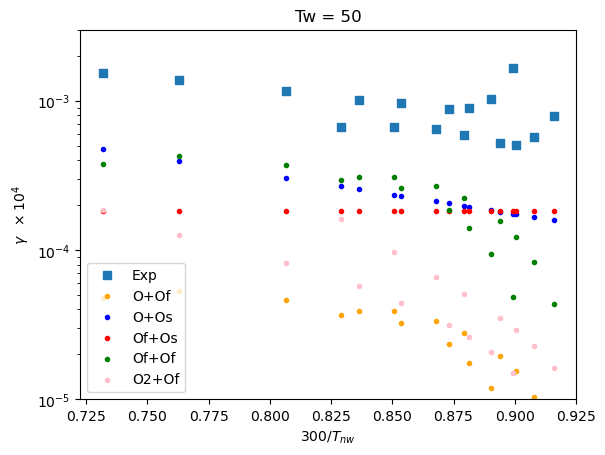

In [7]:

Tw_unique_values = np.unique(Tw_vec)


sum_value = 0

for value in Tw_unique_values:
    Tw = value
    indices = np.where((Tw_vec == Tw))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_total_comp = gammas_data[indices, :]
    
    sum_value += np.sum((gammas_total - gammas_exp_vec[indices])**2)
    
    gammas_exp = gammas_exp_vec[indices]
    Tnw = Tnw_vec[indices]
    print("pair: ", Tnw)
    x_vec = 300*np.reciprocal(Tnw)
    
    pressure = pressure_vec[indices]
    # plt.figure()
    fig, ax = plt.subplots()
    # ax.scatter(x_vec, gammas_total*1e4, label='Total', marker='x')
    ax.scatter(x_vec, gammas_exp, label='Exp', marker='s')
    
    for i in range(gammas_data.shape[1]):
        if gammas_names[i] in plot_reactions_vec:
            label_vec = translate_labels[gammas_names[i]]
            ax.scatter(x_vec, gammas_total_comp[:, i], label=label_vec, marker='.', color=colors_labels[plot_reactions_vec.index(gammas_names[i])])
    
    
    if Tw-273.15 == -20:
        ax.set_yticks(range(0, 51, 10))
        filename = 'Tw-20UpgMod.png'
    if Tw-273.15 == 5:
        ax.set_yticks(range(0, 31, 5))
        filename = 'Tw5UpgMod.png'
    if Tw-273.15 == 25:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw25UpgMod.png'
    if Tw-273.15 == 50:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw50UpgMod.png'
    
    # for i in range(gammas_data.shape[1]):
    #     plt.scatter(x_vec, gammas_total_comp[:, i], label=gammas_names[i], marker='.')
    
    # plt.grid()
    plt.ylim(1e-5, 3e-3)
    plt.xlabel(r"$300/T_{nw}$")
    plt.ylabel(r"$\gamma ~~ \times 10^4$")
    plt.title('Tw = %d' % (Tw-273.15))
    plt.yscale('log')
    plt.legend()

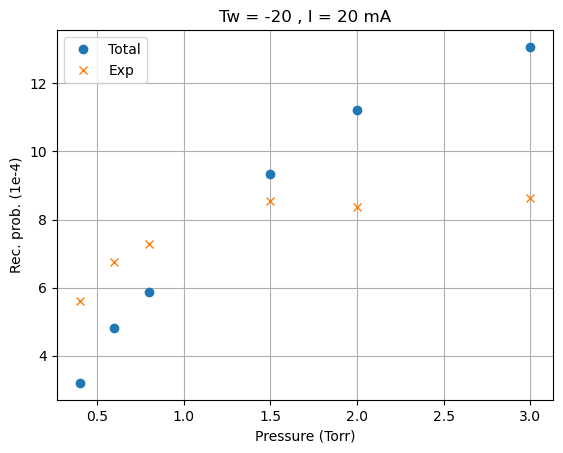

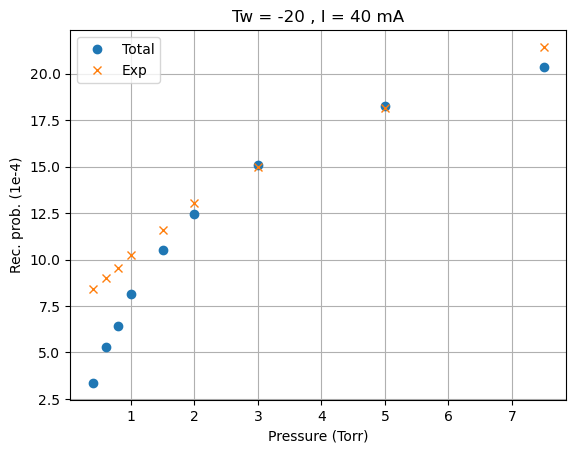

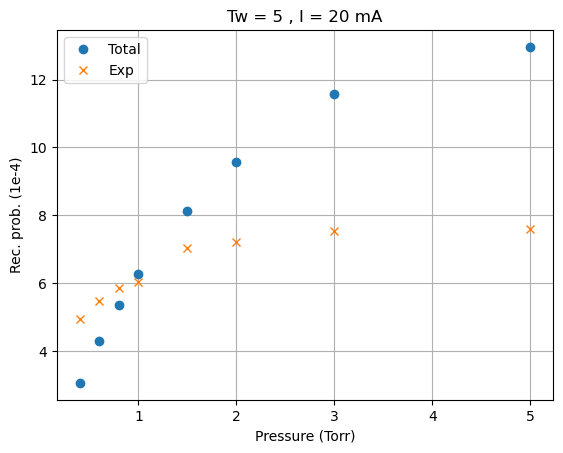

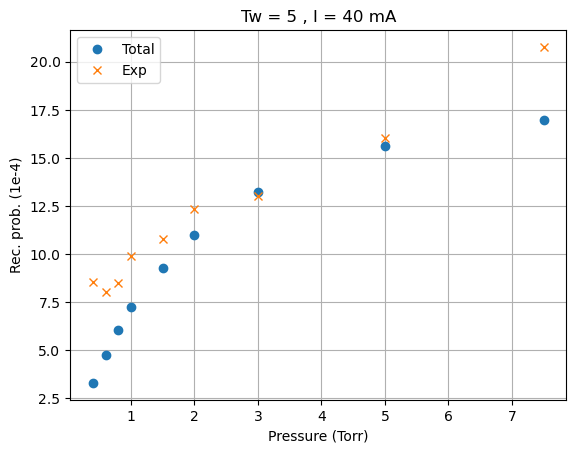

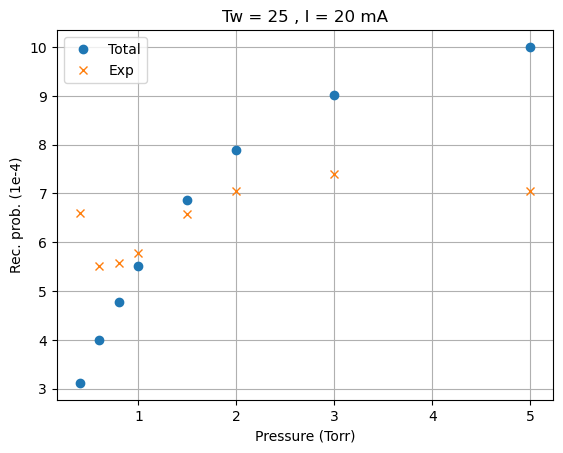

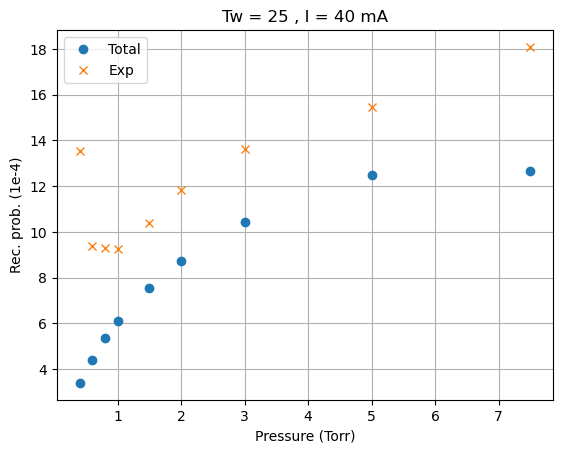

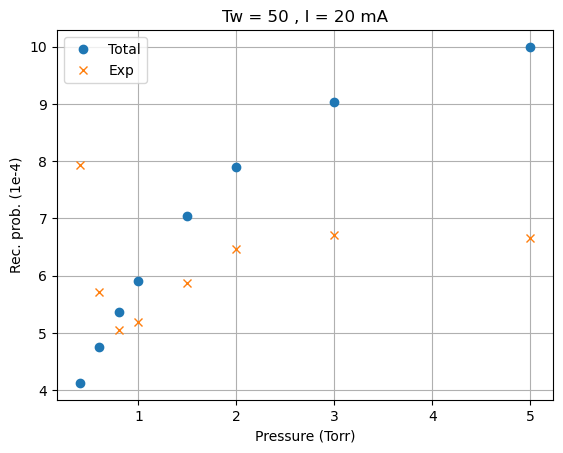

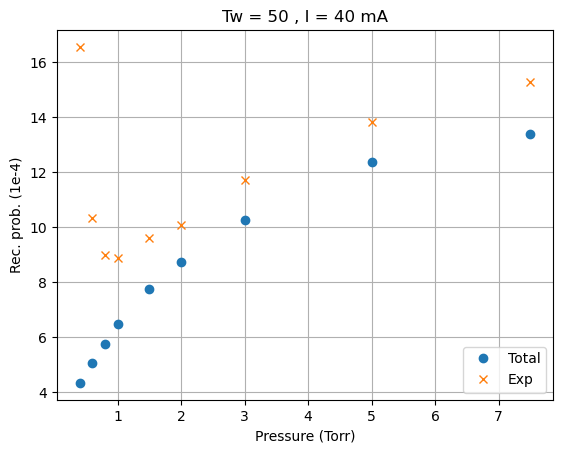

In [8]:
#### Plots as a function of pressure 

Tw_unique_values = np.unique(Tw_vec)
current_unique_values = np.unique(current_vec)

Tw_current_combinations = np.array(np.meshgrid(Tw_unique_values, current_unique_values)).T.reshape(-1, 2)

for pair in Tw_current_combinations:
    Tw = pair[0]
    current = pair[1]
    indices = np.where((Tw_vec == Tw) & (current_vec == current))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_exp = gammas_exp_vec[indices]
    pressure = pressure_vec[indices]
    plt.figure()
    plt.plot(pressure, gammas_total*1e4, 'o', label='Total')
    plt.plot(pressure, gammas_exp*1e4, 'x', label='Exp')
    plt.grid()
    plt.xlabel('Pressure (Torr)')
    plt.ylabel('Rec. prob. (1e-4)')
    plt.title('Tw = %d , I = %d mA' % (Tw-273.15, current))
    plt.legend()
    plt.show()

In [9]:
print(sum_value)

7.113113130178659e-06


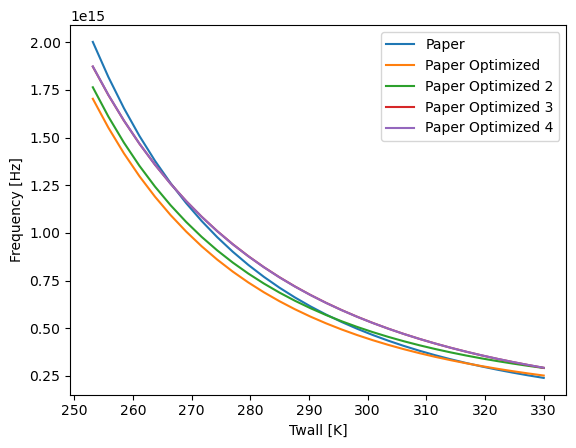

In [13]:

R = 0.00831442
func_freq = lambda Tw: 1e15 * (0.01634 + 1.67e-4 * np.exp(19.75 /(R * Tw)))
func_freq2 = lambda Tw: 1e15 * (0.06815468 + 0.00013756 * np.exp(19.75 /(R * Tw)))
func_freq3 = lambda Tw: 1e15 * (0.10519756 + 0.00013952 * np.exp(19.75 /(R * Tw)))
func_freq4 = lambda Tw: 1e15 * (2.74332762e-03 + 6.23703570e-04 * np.exp(1.68496853e+01 /(R * Tw)))

# A = 5.74040394e-03
    # B = 6.02475063e-04
    # E_nu_d = 1.69206221e+01
    
func_freq5 = lambda Tw: 1e15 * (5.74040394e-03 + 6.02475063e-04 * np.exp(1.69206221e+01 /(R * Tw)))

Twall_vec = np.linspace(253.15, 330, 30)
func_freq_vec = func_freq(Twall_vec)
func_freq_vec2 = func_freq2(Twall_vec)
func_freq_vec3 = func_freq3(Twall_vec)
func_freq_vec4 = func_freq4(Twall_vec)
func_freq_vec5 = func_freq5(Twall_vec)

plt.plot(Twall_vec, func_freq_vec, label='Paper')
plt.plot(Twall_vec, func_freq_vec2, label='Paper Optimized')
plt.plot(Twall_vec, func_freq_vec3, label='Paper Optimized 2')
plt.plot(Twall_vec, func_freq_vec4, label='Paper Optimized 3')
plt.plot(Twall_vec, func_freq_vec5, label='Paper Optimized 4')
plt.xlabel(xlabel='Twall [K]')
plt.ylabel(ylabel='Frequency [Hz]')
plt.legend()
# plt.savefig('figures/freq.png')
